In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('../input/merged_data_ALL3.csv')
features = ['001_SS_Close', '399_SZ_Close', 'HIS_Close', 'IXIC_Close', 'FTSE_Close', 'JM0_Close']
target = '600_Close'

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 创建视窗数据集
def create_sequences(data, target, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        label = target[i + window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

window_size = 60
X, y = create_sequences(df[features].values, df[target].values, window_size)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# 定义和训练Lasso回归模型
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# 预测
y_pred_lasso = lasso.predict(X_test)

# 计算均方误差
lasso_mse = np.mean((y_pred_lasso - y_test) ** 2)
print("Lasso回归的均方误差:", lasso_mse)



Lasso回归的均方误差: 0.06875193026662972


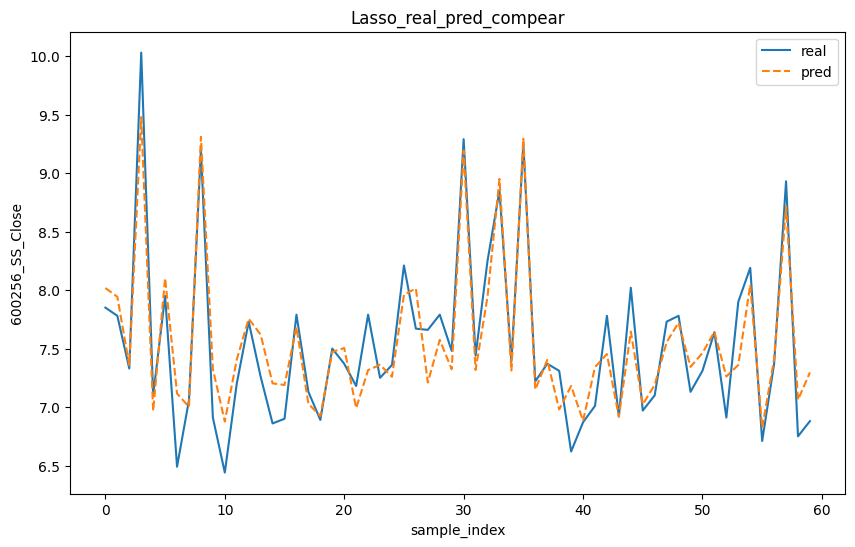

In [4]:

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='real')
plt.plot(y_pred_lasso, label='pred', linestyle='--')
plt.legend()
plt.title('Lasso_real_pred_compear')
plt.xlabel('sample_index')
plt.ylabel('600256_SS_Close')
plt.show()


弹性网回归的均方误差: 0.058829090761245116


C:\Users\Sirius\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.960e-02, tolerance: 1.176e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sirius\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sirius\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sirius\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAP

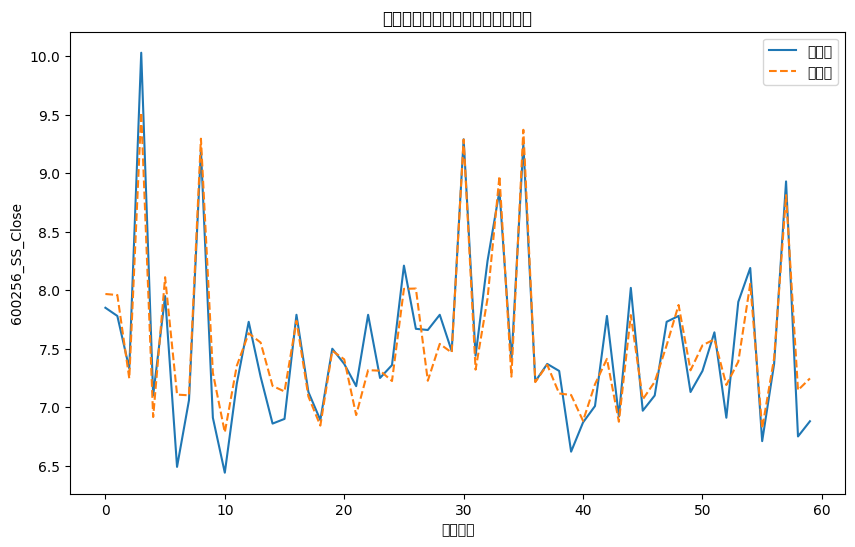

In [5]:
from sklearn.linear_model import ElasticNet

# 定义和训练弹性网回归模型
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# 预测
y_pred_en = elastic_net.predict(X_test)

# 计算均方误差
en_mse = np.mean((y_pred_en - y_test) ** 2)
print("弹性网回归的均方误差:", en_mse)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='真实值')
plt.plot(y_pred_en, label='预测值', linestyle='--')
plt.legend()
plt.title('弹性网回归预测结果与真实值比较')
plt.xlabel('样本索引')
plt.ylabel('600256_SS_Close')
plt.show()
